In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df=pd.read_csv("C:\\Users\\lenovo\\Downloads\\kaggle bike dataset 2024\\train.csv")

In [73]:
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [74]:
df.shape

(10886, 12)

### Handling the null values

In [75]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [76]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### Converting datetime from object to date time data

In [77]:
df['datetime']=pd.to_datetime(df['datetime'])
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

### Creating Year,Months, Daya and Hour columns from datetime field from the data

In [78]:
df['Year']=df['datetime'].dt.year
df['days']=df['datetime'].dt.day
df['Month']=df['datetime'].dt.month
df['Hour']=df['datetime'].dt.hour
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,days,Month,Hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


### Columns not needed as are as follows :
datetime, registered and casual


In [79]:
df.drop(['datetime','registered','casual'],axis=1,inplace=True)


In [80]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'Year', 'days', 'Month', 'Hour'],
      dtype='object')

### EDA

In [81]:
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [82]:
df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [83]:
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [84]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [85]:
df['Year'].value_counts()

Year
2012    5464
2011    5422
Name: count, dtype: int64

In [86]:
df['Month'].value_counts()

Month
5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: count, dtype: int64

In [87]:
df['days'].value_counts()

days
1     575
9     575
17    575
5     575
16    574
15    574
14    574
13    574
19    574
8     574
7     574
4     574
2     573
12    573
3     573
6     572
10    572
11    568
18    563
Name: count, dtype: int64

### Months wise Mean of Counts

----because count is our target variables

In [88]:
r1=df.groupby(['Month'])['count'].mean()
r1
# we are presented this on a bar graph

Month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

### Depicting Months Wise Mean  of counts

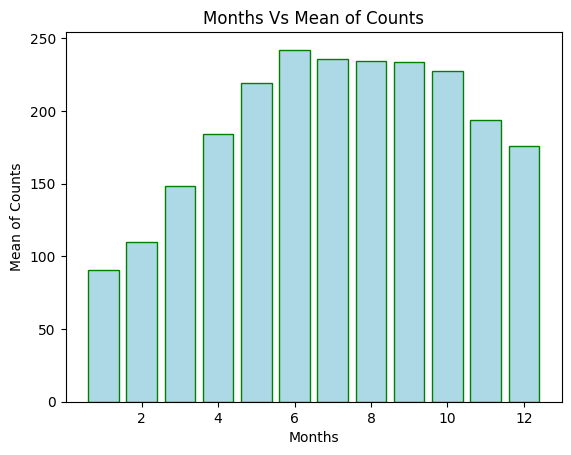

In [89]:
plt.bar(r1.index,r1,color='lightblue',edgecolor='green')
plt.title("Months Vs Mean of Counts")
plt.xlabel("Months")
plt.ylabel("Mean of Counts")
plt.show()

### Depicting Days Wise Mean of counts

In [90]:
r2=df.groupby(['Year'])['count'].mean()
r2

Year
2011    144.223349
2012    238.560944
Name: count, dtype: float64

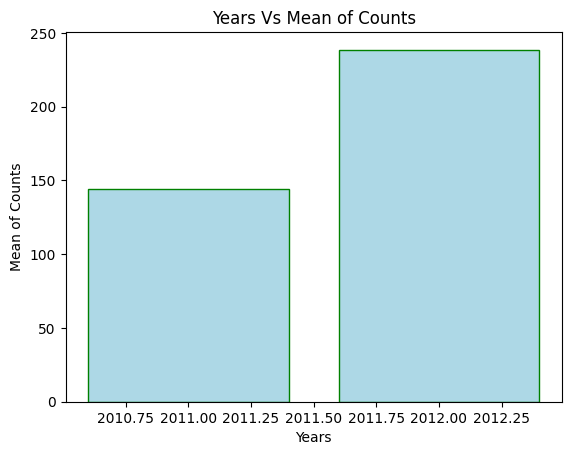

In [91]:
plt.bar(r2.index,r2,color='lightblue',edgecolor='green')
plt.title("Years Vs Mean of Counts")
plt.xlabel("Years")
plt.ylabel("Mean of Counts")
plt.show()

### Histogram for Count

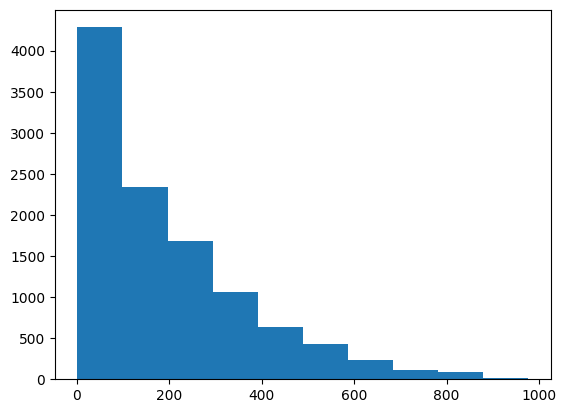

In [92]:
plt.hist(df['count'])
plt.show()  #This is simply shows that is not a Normal Distribution, to converts this Target variable  into a normal distribution 
# we can simply try to use LOG function, Square root functions etc.


### Correlation

<Axes: >

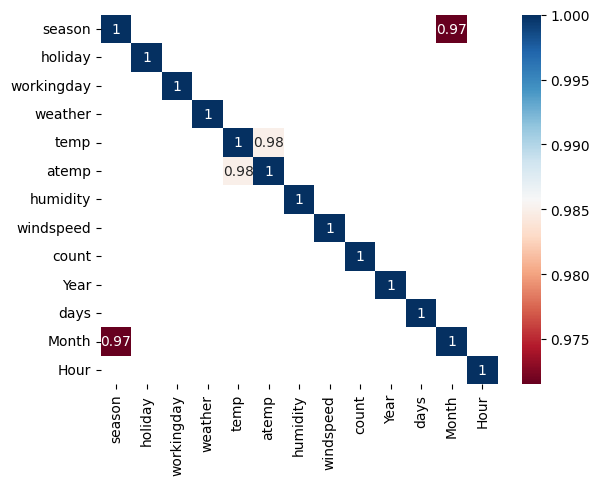

In [93]:
corr=df.corr()
corr=corr[abs(corr)>0.7]
corr
sns.heatmap(corr,annot=True,cmap='RdBu')

#### Inference
1) Temp and atemp are highly correlated <br>
2) Months and Seasons are highly correlated

In [94]:
df1=df.copy()
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Year,days,Month,Hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


### Dropping Highly Correlated Columns

In [95]:
df.drop(['atemp','season'],axis=1,inplace=True)# Axis=1 indicates columns


In [96]:
df.columns

Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'count', 'Year', 'days', 'Month', 'Hour'],
      dtype='object')

### Reading the Test Data

In [97]:
test=pd.read_csv('C:\\Users\\lenovo\\Downloads\\kaggle bike dataset 2024\\test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [98]:
test.isnull().sum() #Handling Null values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [99]:
test.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

### Extract the date , time, hour from test data also


In [100]:
test['datetime']=pd.to_datetime(test['datetime'])
test.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object

In [101]:
test['Year']=test['datetime'].dt.year
test['days']=test['datetime'].dt.day
test['Month']=test['datetime'].dt.month
test['Hour']=test['datetime'].dt.hour
test.head()

### Now we drop the datetime columns from test data after extracing the days,months, hour and year

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,days,Month,Hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,20,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,20,1,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,20,1,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,20,1,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,20,1,4


In [102]:
print(test.columns)
print(test.dtypes)


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'Year', 'days', 'Month', 'Hour'],
      dtype='object')
datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
Year                   int32
days                   int32
Month                  int32
Hour                   int32
dtype: object


In [103]:
test['season'].value_counts()

season
3    1763
2    1676
1    1556
4    1498
Name: count, dtype: int64

In [104]:
test.drop(['datetime','season','atemp'],axis=1,inplace=True)



In [105]:
print(test.columns) ## these all columns which have to be similar
print(df.columns)


Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'Year', 'days', 'Month', 'Hour'],
      dtype='object')
Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'count', 'Year', 'days', 'Month', 'Hour'],
      dtype='object')


### now we have to 
# Selecting dependent and independent Features

In [106]:
x=df.drop('count',axis=1) # X denotes independent feature
y=df['count']   # Y denotes dependent Variable

print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(10886, 10)
(10886,)


## Splitting data into Training and Test data

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(type(x_train),type(x_test))
print(type(y_train),type(y_test))

(8164, 10)
(8164,)
(2722, 10)
(2722,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


### Importing the ML Regression Libraries

In [109]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression,Ridge,Lasso

from sklearn.neighbors import KNeighborsRegressor

In [110]:
def reg_eval_metr(y,ypred):
    mae=mean_absolute_error(y,ypred)
    mse=mean_squared_error(y,ypred)
    Rmse=np.sqrt(mean_squared_error(y,ypred))
    R2_score=r2_score(y,ypred)
    
    print('MAE:',mae)
    print('MSE:',mse)
    print('RMSE:',Rmse)
    print('R2_score:',R2_score)

In [111]:
def train_test_scr(model):
    print("Training Score:",model.score(x_train,y_train))
    print("Testing Score:",model.score(x_test,y_test))

## 1) LinearRegression

In [112]:
l1=LinearRegression()
l1.fit(x_train,y_train)
y_pred_m1=l1.predict(x_test)

In [113]:
train_test_scr(l1)



Training Score: 0.3865395481624847
Testing Score: 0.3899463099399232


In [114]:
reg_eval_metr(y_test,y_pred_m1)

MAE: 107.25082613981185
MSE: 20750.314085300495
RMSE: 144.04969311074737
R2_score: 0.3899463099399232


## Computing model Coefficient and Intercept

In [115]:
def reg_coeff_intercept(model):
    print('Model_coefficient',model.coef_)
    print('Model_Intercept:',model.intercept_)


In [116]:
reg_coeff_intercept(l1)

Model_coefficient [-18.34828575  -1.33021488  -5.58145535   6.63408606  -2.01574749
   0.36022733  79.31111902   0.35828012   7.6292274    7.92942037]
Model_Intercept: -159493.73088670266


[-18.34828575  -1.33021488  -5.58145535   6.63408606  -2.01574749
   0.36022733  79.31111902   0.35828012   7.6292274    7.92942037]
-159493.73088670263

In [117]:
train_test_scr(l1)

Training Score: 0.3865395481624847
Testing Score: 0.3899463099399232


## 2) KNN Regression

In [118]:
knn=KNeighborsRegressor(n_neighbors=15)# number of nearest neibhbour  K=15
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=15)

In [119]:
train_test_scr(knn) # Considered a better score the what we have obtained by using  the linear regression

Training Score: 0.5806550628602934
Testing Score: 0.5058027696093972


In [120]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([317.66666667,  36.6       , 535.86666667, ..., 120.33333333,
         6.06666667,  19.06666667])

In [121]:
reg_eval_metr(y_test,y_pred_knn)

MAE: 91.27905951506246
MSE: 16809.582365907423
RMSE: 129.65177347767914
R2_score: 0.5058027696093972


##  Reg_coeff_intercept is not apply on knn regression

## Now we can apply
## 3) Ridge and Lasso Regression

In [122]:
Rid_reg=Ridge(alpha=10)

Rid_reg.fit(x_train,y_train)

Ridge(alpha=10)

In [123]:
y_pred_ridreg=Rid_reg.predict(x_test)
y_pred_ridreg

array([175.2955559 ,  58.56691703, 380.57203907, ..., 111.42828403,
       -56.59581689, -29.55815226])

In [124]:
reg_eval_metr(y_test,y_pred_ridreg)

MAE: 107.23636304036556
MSE: 20751.28928583934
RMSE: 144.05307801584573
R2_score: 0.3899176393046343


In [125]:
train_test_scr(Rid_reg)

Training Score: 0.3865377802967499
Testing Score: 0.3899176393046343


In [126]:
reg_coeff_intercept(Rid_reg)

Model_coefficient [-17.48158813  -1.25261265  -5.54369334   6.63565271  -2.01740147
   0.35828944  78.91461748   0.35864694   7.62779844   7.92787737]
Model_Intercept: -158696.17850013872


## 4) Lasso Regression

In [127]:
Lasso_reg=Lasso(alpha=0.1)
Lasso_reg.fit(x_train,y_train)


Lasso(alpha=0.1)

In [128]:
train_test_scr(Lasso_reg)

Training Score: 0.3865212863010059
Testing Score: 0.3901074132904587


In [129]:
y_predlasso=Lasso_reg.predict(x_test)
y_predlasso

array([178.28798626,  58.00629872, 379.85586366, ..., 111.29434813,
       -56.43157804, -26.40881819])

In [130]:
print(reg_eval_metr(y_test,y_predlasso))
print(reg_eval_metr(y_test,y_pred_knn)) # KNN regression mein score mse mae least hai compare to others so this is best fir model for predctions
print(reg_eval_metr(y_test,y_pred_m1))
print(reg_eval_metr(y_test,y_pred_ridreg))

MAE: 107.21995307333108
MSE: 20744.83432970148
RMSE: 144.03067148944865
R2_score: 0.3901074132904587
None
MAE: 91.27905951506246
MSE: 16809.582365907423
RMSE: 129.65177347767914
R2_score: 0.5058027696093972
None
MAE: 107.25082613981185
MSE: 20750.314085300495
RMSE: 144.04969311074737
R2_score: 0.3899463099399232
None
MAE: 107.23636304036556
MSE: 20751.28928583934
RMSE: 144.05307801584573
R2_score: 0.3899176393046343
None


In [131]:
reg_coeff_intercept(Lasso_reg)

Model_coefficient [-14.01791805  -0.51069773  -5.26541782   6.63446713  -2.02171539
   0.35139408  78.87889679   0.35584645   7.62219894   7.92476031]
Model_Intercept: -158624.8441809748


## Applying the best Model (KNN Regression) to the Test_Data

In [132]:
test.columns

Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'Year', 'days', 'Month', 'Hour'],
      dtype='object')

In [133]:
x_train.columns

Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'Year', 'days', 'Month', 'Hour'],
      dtype='object')

## Now we have Generated a Predictions for the test data set


In [134]:
print(x_test.columns)

print(x_train.columns)

Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'Year', 'days', 'Month', 'Hour'],
      dtype='object')
Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'Year', 'days', 'Month', 'Hour'],
      dtype='object')


In [135]:
test_pred=knn.predict(test)
test_pred


array([ 82.53333333,  22.4       ,  34.86666667, ..., 168.73333333,
       189.4       , 137.26666667])

In [136]:
test['Count_predictions']=test_pred
test.head(6)

,holiday,workingday,weather,temp,humidity,windspeed,Year,days,Month,Hour,Count_predictions
0,0,1,1,10.66,56,26.0027,2011,20,1,0,82.533333
1,0,1,1,10.66,56,0.0000,2011,20,1,1,22.400000
2,0,1,1,10.66,56,0.0000,2011,20,1,2,34.866667
3,0,1,1,10.66,56,11.0014,2011,20,1,3,47.533333
4,0,1,1,10.66,56,11.0014,2011,20,1,4,47.533333
5,0,1,1,9.84,60,15.0013,2011,20,1,5,65.600000


## Store this data into Csv_files

In [146]:
test.to_csv=("Final_SubmissionBike_Rental_Predictions.csv")
